In [1]:
import pandas as pd
music_data = pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [3]:
X = music_data.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [4]:
Y = music_data['genre']
Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [8]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,Y)
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [9]:
predictions = model.predict([[21, 1], [22, 0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, predictions)
score

0.75

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, predictions)
score

0.2

In [13]:
import joblib
joblib.dump(model, 'music-recommendor.joblib')

['music-recommendor.joblib']

In [14]:
model = joblib.load('music-recommendor.joblib')
predictions = model.predict([[21, 1]])
predictions

array(['Jazz'], dtype=object)

In [15]:
from sklearn import tree
tree.export_graphviz(model, out_file='music-recommender.dot', feature_names=['age', 'gender'], class_names=sorted(Y.unique()), label='all', rounded=True, filled=True)

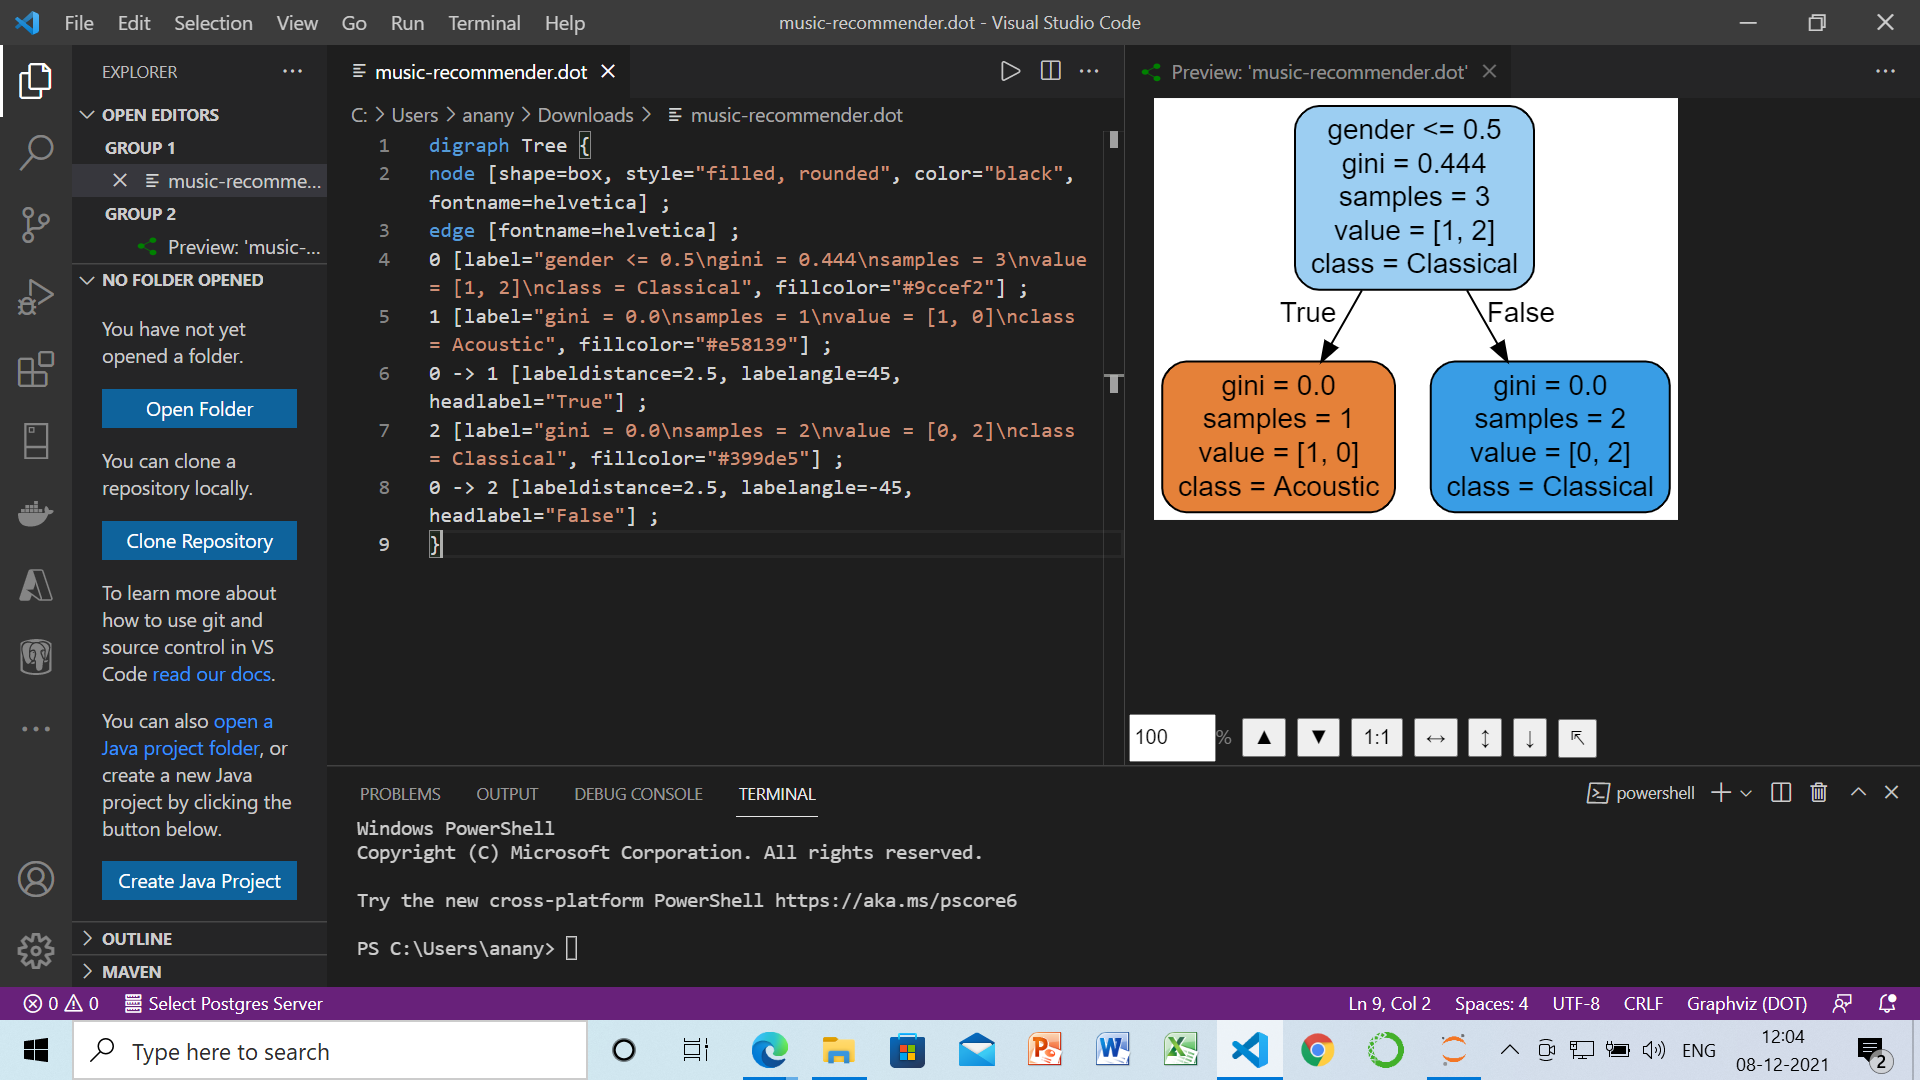

In [16]:
from IPython.display import Image
Image("dot.png")